In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr

In [3]:
dfMENSAL = pd.read_excel('BASE_MENSAL_GAME.xlsx')
dfCOMPRA = dfMENSAL.query('OPERAÇÃO == "Compra"')
dfVENDA = dfMENSAL.query('OPERAÇÃO == "Venda"')

dfCOMPRA_final = dfCOMPRA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last', 'VAR_PRECO':'sum','CATEGORIAS ATUAIS':'last',
                                                                      'CATEGORIAS ANTIGAS':'first','Participação_sup':'sum','DATA':'first',
                                                                      'CATEGORIAS':'first'})
                                                                                                                            
dfVENDA_final = dfVENDA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS ATUAIS':'last',
                                                                    'CATEGORIAS ANTIGAS':'first','Participação_sup':'sum','DATA':'first',
                                                                    'CATEGORIAS':'first'})

total_compra = dfCOMPRA['VAR_PRECO'].sum()
total_venda = dfVENDA['VAR_PRECO'].sum()
delta_sum = total_compra+total_venda
print('o valor de compra é {} e o valor de venda é {}, e o total é {}'.format(total_compra, total_venda, delta_sum))

o valor de compra é 2261695.0 e o valor de venda é 2261693.91, e o total é 4523388.91


In [4]:
dfCOMPRA_final['Participação_sup'] = (dfCOMPRA_final['VAR_PRECO']/total_compra)*100
compra1 = dfCOMPRA_final['Participação_sup'].sum()
dfVENDA_final['Participação_sup'] = (dfVENDA_final['VAR_PRECO']/total_venda)*100
venda1 = dfVENDA_final['Participação_sup'].sum()
print('o total de compra é {} e o total de venda é {}'.format(compra1, venda1))

o total de compra é 100.0 e o total de venda é 100.0


In [5]:
plim = dfCOMPRA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(str)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,291242.41,Compra PF,12.88,0-1k
1,1,Compra,PJ,1339.72,Compra PJ,0.06,0-1k
2,2,Compra,PF,260310.80,Compra PF,11.51,1k-5k
3,2,Compra,PJ,26077.38,Compra PJ,1.15,1k-5k
4,3,Compra,PF,265164.19,Compra PF,11.72,5k-20k
5,4,Compra,PF,62860.04,Compra PF,2.78,20k-50k
6,5,Compra,PF,107810.89,Compra PF,4.77,50k-100k
7,6,Compra,PF,22309.56,Compra PF,0.99,100k-500k
8,6,Compra,PJ,60029.16,Compra PJ,2.65,100k-500k
9,9,Compra,PJ,1164550.85,Compra PJ,51.49,3M-15M


In [6]:
v = dfVENDA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

v.set_index('CATEGORIAS')

v['CATEGORIAS'] = v['CATEGORIAS'].astype(str)

v['OPERAÇÃO_PF_PJ'] = v['OPERAÇÃO'] + ' ' + v['PF_PJ']

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['% PARTICIPAÇÃO'] = ((v['VAR_PRECO']/(total_venda))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

v['CLASSE_CATEGORIA'] = v['CATEGORIAS'].map(mapeamento)

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v = v.sort_values(by='CATEGORIAS')

v['VAR_PRECO'].astype(float)

v['VAR_PRECO'] = v['VAR_PRECO'].round(2)

v

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Venda,PF,-163146.19,Venda PF,-7.21,0-1k
1,1,Venda,PJ,-82.52,Venda PJ,-0.00,0-1k
2,2,Venda,PF,-223037.18,Venda PF,-9.86,1k-5k
3,2,Venda,PJ,-26950.86,Venda PJ,-1.19,1k-5k
4,3,Venda,PF,-378706.16,Venda PF,-16.74,5k-20k
5,4,Venda,PF,-121210.90,Venda PF,-5.36,20k-50k
6,5,Venda,PF,-105754.16,Venda PF,-4.68,50k-100k
7,6,Venda,PF,-794.58,Venda PF,-0.04,100k-500k
8,6,Venda,PJ,-268117.62,Venda PJ,-11.85,100k-500k
9,8,Venda,PJ,-973893.74,Venda PJ,-43.06,1M-3M


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_5536\1492811276.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())


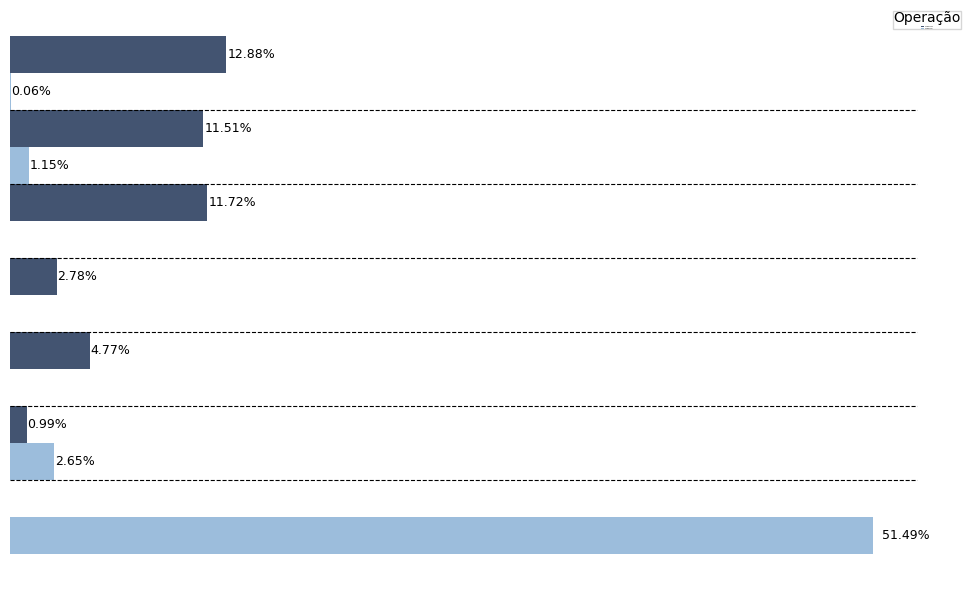

In [7]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=plim, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(plim['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_5536\1108589480.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())


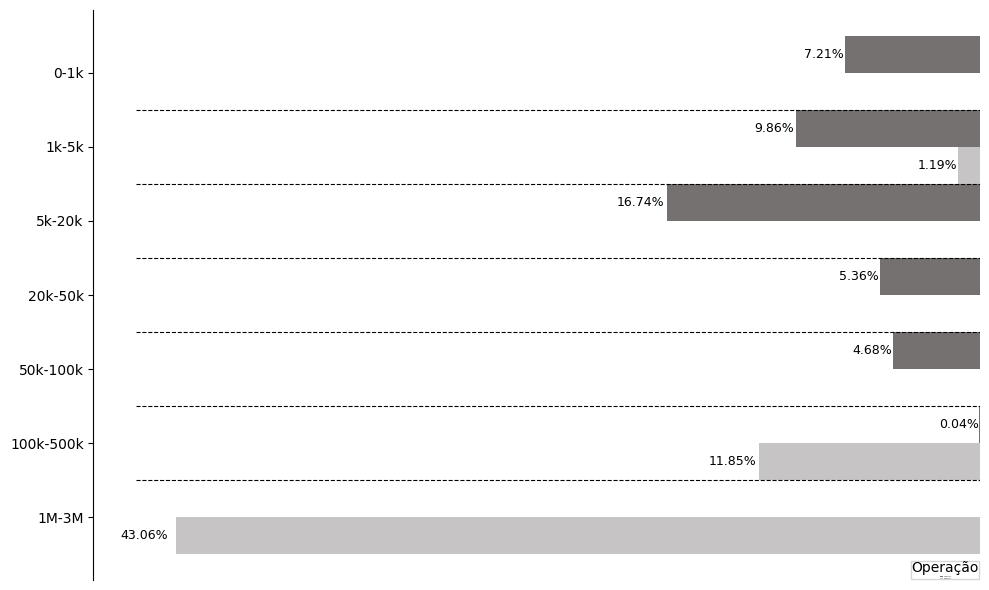

In [8]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=v, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(v['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [11]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'

TOP10_Compra = dfCOMPRA_final[[Nome,cat,tipo,fin_mov,cat_atuais]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS
NOME,,,,
CAPITANIA SECURITIES II FDO IN,3M-15M,PJ,1085801.65,3M-15M
EMERSON XAVIER NASCIMENTO,50k-100k,PF,91275.49,50k-100k
BRL VI FI IMOBILIARIO,3M-15M,PJ,78749.20,3M-15M
XP INVESTIMENTOS CCTVM S/A,100k-500k,PJ,60029.16,100k-500k
XTX MARKETS TRADING LIMITED,1k-5k,PJ,26077.38,20k-50k
MARCELO RAMOS ALVIM,5k-20k,PF,23096.79,5k-20k
JULIEN AVRIL,100k-500k,PF,21200.73,100k-500k
GUSTAVO BALTHAZAR NEVES,5k-20k,PF,18516.41,5k-20k
LEANDRO HENRIQUE MENDONCA DE OLIVEIR,5k-20k,PF,13535.18,5k-20k


In [12]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = dfVENDA_final[[Nome,cat,tipo,fin_mov, cat_atuais]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS ATUAIS'] = TOP10_Venda['CATEGORIAS ATUAIS'].fillna('0-1k')

TOP10_Venda.set_index('NOME')

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS
NOME,,,,
CAPITANIA REIT MASTER CP FIC DE FIM,1M-3M,PJ,973209.02,20k-50k
XP INVESTIMENTOS CCTVM S/A,100k-500k,PJ,155524.99,50k-100k
CAPITANIA RADAR 90 MASTER FIM CP LP,100k-500k,PJ,112592.63,0-1k
EMERSON XAVIER NASCIMENTO,50k-100k,PF,89190.60,0-1k
MARCELO RAMOS ALVIM,5k-20k,PF,30718.94,1k-5k
RODOLFO KOCHE,20k-50k,PF,27627.51,0-1k
XTX MARKETS TRADING LIMITED,1k-5k,PJ,26950.86,1k-5k
THIAGO FELIPE MICHELINI,20k-50k,PF,25101.02,0-1k
GRAZIELA DONDONI,5k-20k,PF,19538.16,0-1k


In [4]:
game11 = ['GAME11.SA']
fundos_recebiveis = ['KNIP11.SA', 'KNCR11.SA', 'MXRF11.SA', 'IRDM11.SA', 'KNHY11.SA', 'CPTS11.SA', 'RECR11.SA', 'HCTR11.SA',
          'KNHF11.SA', 'MCCI11.SA', 'HGCR11.SA', 'KNUQ11.SA', 'VGHF11.SA', 'VRTA11.SA', 'VGIR11.SA', 'RBRR11.SA',
          'VCJR11.SA', 'DEVA11.SA', 'RBRY11.SA', 'URPR11.SA', 'KNSC11.SA', 'MCRE11.SA', 'VGIP11.SA', 'CVBI11.SA',
          'BTCI11.SA', 'XPCI11.SA', 'RZAK11.SA', 'HABT11.SA', 'BCRI11.SA', 'CACR11.SA', 'AFHI11.SA', 'BARI11.SA',
          'SNCI11.SA', 'KCRE11.SA', 'PORD11.SA', 'MANA11.SA', 'VSLH11.SA', 'OUJP11.SA', 'WHGR11.SA', 'RBRX11.SA',
          'HSAF11.SA', 'KIVO11.SA', 'SPXS11.SA', 'ARRI11.SA', 'CYCR11.SA', 'CLIN11.SA']
papel = ['Recebivel']

def excluir_5_dig(COTA):
    return str(COTA)[:6]

#def peers(x):
 #   if x in peers_diretos:
  #      return 'PEER'
   # else:
    #    return 'NAO PEER'
    
def tijolo_papel(x):
    if x == 'Recebivel':
        return "Papel"
    elif x == "XXXX":
        return "Tijolo"
    else:
        return "Tijolo"

data_inicial = '2024-12-02'
data_final = '2024-12-31'

tab_cotacoes = yf.download(fundos_recebiveis, data_inicial, data_final)['Close']
tab_cotacoes= tab_cotacoes.round(2)
tab_cotacoes.index = pd.to_datetime(tab_cotacoes.index)

tab_game11 = yf.download(game11, data_inicial, data_final)['Close']
tab_game11 = tab_game11.round(2)
tab_game11.index = pd.to_datetime(tab_game11.index)

var_mensal = (tab_cotacoes.loc['2024-12-30'] - tab_cotacoes.loc['2024-12-02'])/tab_cotacoes.loc['2024-12-02']
var_game11 = (tab_game11.loc['2024-12-30'] - tab_game11.loc['2024-12-02'])/tab_game11.loc['2024-12-02']

tab_mensal = pd.DataFrame(var_mensal)
tab_mensal = tab_mensal.rename(columns={0:'VARIAÇÃO'})

df_game11 = pd.DataFrame(var_game11)
df_game11 = df_game11.rename(columns = {0:'VARIAÇÃO'})

media_papel = (tab_mensal['VARIAÇÃO'].mean())
definitivo_game11 = (df_game11['VARIAÇÃO'].mean())

consolidado = {'VAR_PAPEL':[media_papel], 'VAR_GAME11':[definitivo_game11]}
df_papelxgame11 = pd.DataFrame(consolidado)
df_papelxgame11

[*********************100%***********************]  46 of 46 completed
[*********************100%***********************]  1 of 1 completed


,VAR_PAPEL,VAR_GAME11
0,-0.022924,-0.028136
